In [1]:
def label(string: str):
    parts = string.split("_")
    code_dim = int(parts[1])
    learning_rate = float(parts[2])
    batch_size = int(parts[3])
    return f"Code Dimension: {code_dim}, Learning Rate: {learning_rate}, Batch Size: {batch_size}"

optimizer_36_0.9_128
optimizer_36_1_128
optimizer_12_0.9_128
optimizer_36_0.9_16
optimizer_36_0.09_128
optimizer_best
optimizer_36_0.9_512
optimizer_108_0.9_128


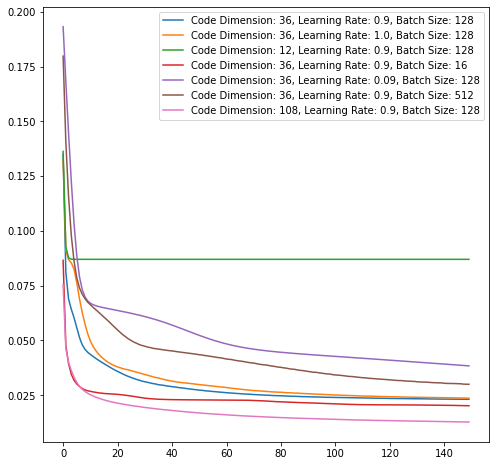

In [7]:
import pickle
import os
import matplotlib.pyplot as plt

from models.neural_network import CustomizedNeuralNetwork
from models.optimizer import Optimizer

plt.figure(figsize=(8, 8))  


path = "saved_models/optimizers/"

code_dims = [12, 36, 108]
learning_rates = [1, 0.9, 0.09]
batch_sizes = [16, 128, 512]

basic_metrics = [code_dims[1], learning_rates[1], batch_sizes[1]]

for file in os.listdir(path):
    print(file)
    if "best" in file:
        continue
    with open(path + file, "rb") as pickle_file:
        optimizer: Optimizer = pickle.load(pickle_file)
        plt.plot(optimizer.loss, label=label(file))

   
   
plt.legend()
plt.show()
        

In [12]:
from dataset.dataset import load_fashion_mnist_dataset
import numpy as np

_, X_test = load_fashion_mnist_dataset()
X_test.shape

(10000, 784)

In [26]:

def get_random_test():
    random_index = np.random.randint(0, 1000)
    return X_test[random_index]

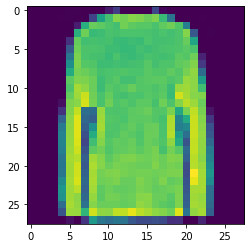

In [96]:
from matplotlib import pyplot as plt

random_test = get_random_test()

plt.imshow(random_test.reshape(28, 28), interpolation='nearest')
plt.show()

In [97]:

from umap import UMAP

from models.neural_network import Autoencoder

path = "saved_models/networks/"

trained_networks: Autoencoder = []

for file in os.listdir(path):
    with open(path + file, "rb") as pickle_file:
        network: Autoencoder = pickle.load(pickle_file)
        
    trained_networks.append(network)


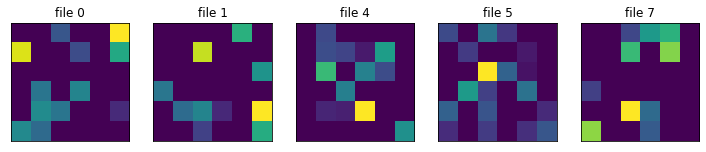

In [98]:
from numpy.typing import NDArray

n = len(trained_networks)
idx = 0

plt.figure(figsize=(20, 4))

compressed_data: list[NDArray] = []

for i, network in enumerate(trained_networks):
    data = network.get_encoded(random_test, 2)
    compressed_data.append(data)

    try:
        data.reshape(6,6)
        ax = plt.subplot(1, n, idx + 1)
        plt.imshow(data.reshape(6, 6), interpolation='nearest')
        plt.title(f"file {i}")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        idx+=1
    except:
        continue

    

plt.show()

/home/olga/.local/lib/python3.10/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


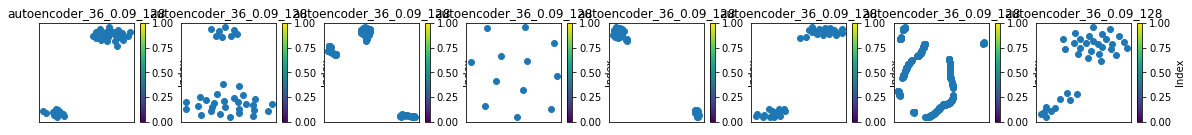

In [99]:
n = len(compressed_data)

plt.figure(figsize=(20, 4))

for i, data in enumerate(compressed_data):
    umap = UMAP(n_components=2)
    embedding = umap.fit_transform(data.reshape(-1, 1))

    ax = plt.subplot(2, n, i + 1 + n)
    plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')
    plt.title(file)
    plt.colorbar(label='Index')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    i += 1

plt.show()